# Refine the Data

In [ ]:
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings("ignore")

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
items_raw = pd.read_csv("data/items_raw.csv")
item_features = pd.read_csv("data/item_features.csv")

In [3]:
items_raw["release_date"] = pd.to_datetime(items_raw.release_date, infer_datetime_format=True)
items_raw["year"] = items_raw.release_date.apply(lambda x: str(x.year))

C:\Users\aryan\AppData\Local\Temp\ipykernel_54224\2825921054.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  items_raw["release_date"] = pd.to_datetime(items_raw.release_date, infer_datetime_format=True)


In [4]:
items_main = items_raw.drop(['video_release_date', 'release_date', 'imdb_url'], axis=1).copy()

In [5]:
items_addtl = item_features[['overview', 'original_language', 'runtime', 'vote_average', 'vote_count', "movie_id"]].copy()

In [6]:
items = pd.merge(left=items_main, right=items_addtl, on="movie_id", how="left")

In [7]:
items.head()

,movie_id,title,genre_unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,SciFi,Thriller,War,Western,year,overview,original_language,runtime,vote_average,vote_count
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,1995,"Led by Woody, Andy's toys live happily in his ...",en,81.0,7.968,18757.0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,1,0,0,1995,When a powerful satellite system falls into th...,en,130.0,6.900,3990.0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,1,0,0,1995,It's Ted the Bellhop's first night on the job....,en,98.0,5.859,2686.0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,1995,Chili Palmer is a Miami mobster who gets sent ...,en,105.0,6.495,1090.0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,1,0,0,1995,An agoraphobic psychologist and a female detec...,en,124.0,6.507,995.0


In [8]:
items.overview.isna().sum()

np.int64(11)

In [9]:
items.overview.fillna("None", inplace=True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_54224\1913031048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  items.overview.fillna("None", inplace=True)


## Image Features

In [10]:
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [11]:
base_modelv3 = InceptionV3(weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [12]:
model= Model(inputs=base_modelv3.input,  outputs=base_modelv3.output)

In [13]:
def preprocess_input(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x

In [14]:
images = []
for name in listdir("data/posters"):
    images.append(name)

In [15]:
images_1 = images[:1000]

In [16]:
def load_photos_predict(directory):
    images = []
    for name in images_1:
        filename = directory + '/' + name
        image = load_img(filename, target_size=(299, 299))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = np.expand_dims(image, axis=0)
        # prepare the image for the  model
        image = preprocess_input(image)
        # get image id
        image_id = name.split('.')[0]
        feature = model.predict(image).ravel()
        images.append(feature)
        
    return images

In [20]:
%%time
poster_features = load_photos_predict("data/posters")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━

## Build nearest neighbor model

In [21]:
from reco.recommend import get_similar
from sklearn.neighbors import NearestNeighbors, VALID_METRICS
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL

In [22]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

In [23]:
def get_similar(embedding, k):
    model_similar_items = NearestNeighbors(n_neighbors=k, metric="cosine",
                                           algorithm="brute").fit(embedding)
    distances, indices = model_similar_items.kneighbors(embedding)
    
    return distances, indices

In [24]:
%%time
item_distances, item_similar_indices = get_similar(poster_features[:100], 5)

CPU times: total: 406 ms
Wall time: 215 ms


In [25]:
item_similar_indices[:5]

array([[ 0,  1, 88, 28, 75],
       [ 0,  1, 88, 28, 75],
       [ 2, 44, 18, 21, 88],
       [ 3,  5, 46, 21, 51],
       [ 4, 58,  5, 10, 19]])

In [34]:
def show_similar(item_index, item_similar_indices):
    
    movie_ids = item_similar_indices[item_index]
    
    images = []
    titles = []  # We could add titles if you have movie titles available
    
    for movie_id in movie_ids:
        img_path = 'data/posters/' + str(movie_id+1) + '.0.jpg'  # Add .0 to match your file pattern
        try:
            images.append(mpimg.imread(img_path))
        except FileNotFoundError:
            print(f"Image not found: {img_path}")
            # Try alternative paths if the first one fails - uncomment if needed
            # try:
            #     img_path = 'data/posters/' + str(movie_id+1) + '.jpg'
            #     images.append(mpimg.imread(img_path))
            # except FileNotFoundError:
            #     print(f"Alternative image path also not found: {img_path}")
    
    if not images:
        print("No images found to display.")
        return
        
    plt.figure(figsize=(20,10))
    columns = 5
    rows = (len(images) // columns) + (1 if len(images) % columns > 0 else 0)  # Calculate proper integer rows
    
    for i, image in enumerate(images):
        plt.subplot(rows, columns, i + 1)
        plt.axis('off')
        plt.imshow(image)
    
    plt.tight_layout()
    plt.show()

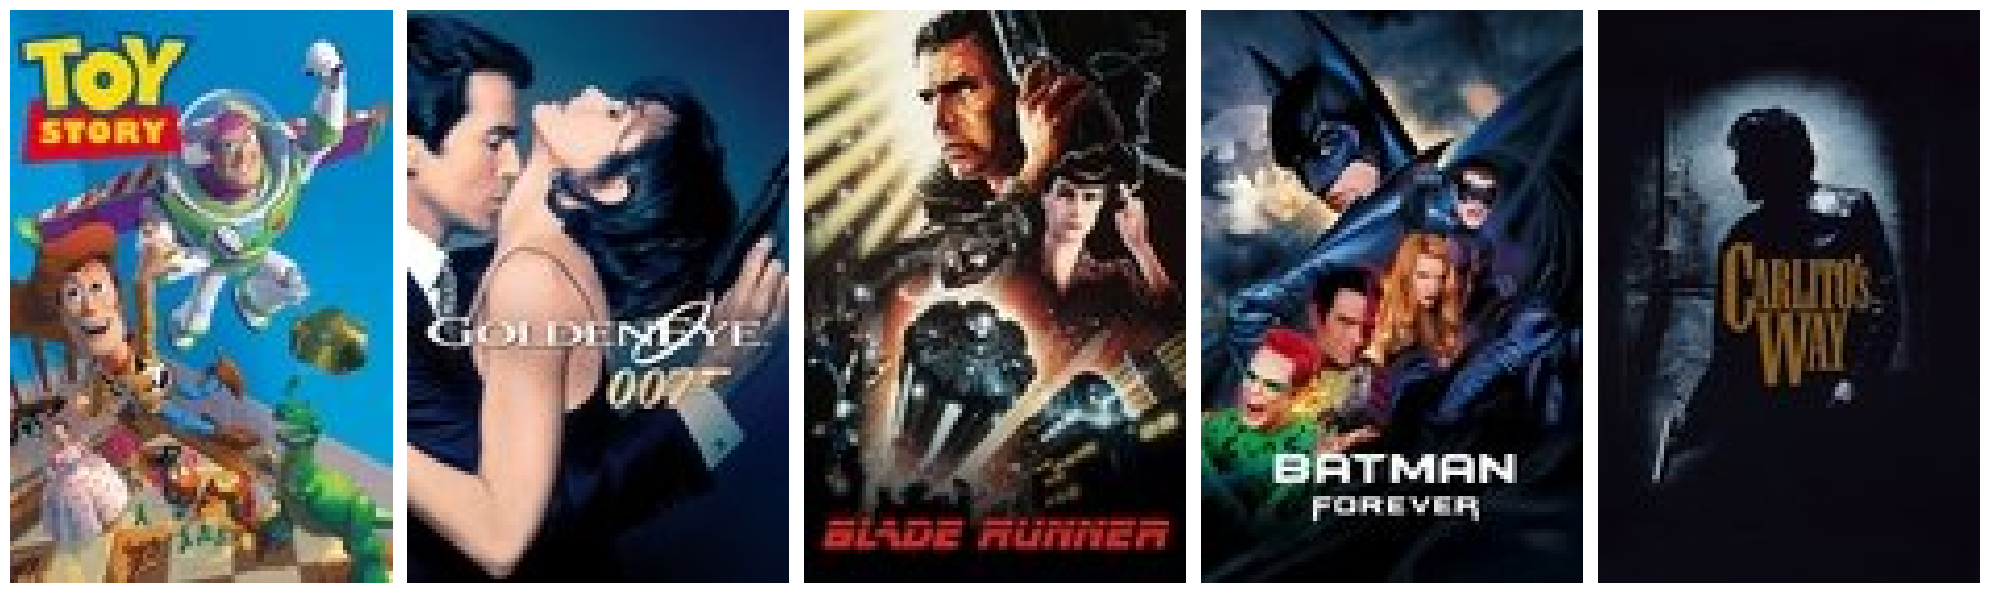

In [35]:
show_similar(0, item_similar_indices)